# **The Sparks Foundation**
## Computer Vision & IOT
**Task 2** - Color Identification in Images

**Description** - Implement an image color detector which identifies all the colors in an image or video

**Executed by** - Rijul Kumar | rijul2310@gmail.com

---



**Importing the libraries**

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

**Defining image**

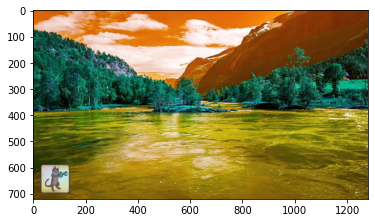

In [16]:
img = cv2.imread("image.jpg")
imgWidth = img.shape[1] - 40
plt.imshow(img)

**Original color image**

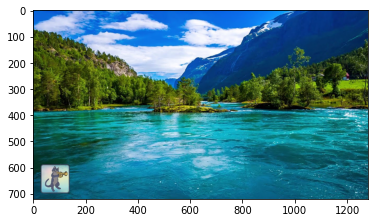

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

**Identifying colors**

In [18]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [19]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [20]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

**Output**

[array([  8.56603295,  67.85428813, 101.98371356]),
 array([115.31278405, 181.15949313, 215.54552746]),
 array([ 14.31127708, 115.63508425, 224.93457194]),
 array([ 96.72127788, 112.64942737,  32.09969861]),
 array([35.90298597, 51.23580173, 16.38426396]),
 array([ 29.85179175, 157.62320329, 179.22630324]),
 array([213.01580637, 224.39688812, 244.94329464]),
 array([ 14.30423767, 112.22643129, 135.21656246])]

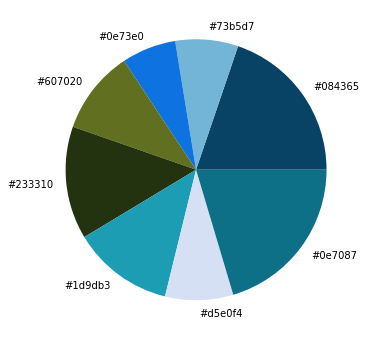

In [23]:
get_colors(get_image('image.jpg'), 8, True)